<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Logistic-回归" data-toc-modified-id="1.-Logistic-回归-1">1. Logistic 回归</a></span><ul class="toc-item"><li><span><a href="#1.1-Logistic-函数" data-toc-modified-id="1.1-Logistic-函数-1.1">1.1 Logistic 函数</a></span></li><li><span><a href="#1.2-Logistic-回归模型" data-toc-modified-id="1.2-Logistic-回归模型-1.2">1.2 Logistic 回归模型</a></span><ul class="toc-item"><li><span><a href="#1.2.1-模型参数估计" data-toc-modified-id="1.2.1-模型参数估计-1.2.1">1.2.1 模型参数估计</a></span></li></ul></li></ul></li><li><span><a href="#2.-Sklearn-实现" data-toc-modified-id="2.-Sklearn-实现-2">2. Sklearn 实现</a></span></li><li><span><a href="#参考资料" data-toc-modified-id="参考资料-3">参考资料</a></span></li></ul></div>

相关文章：

[机器学习 | 目录](https://blog.csdn.net/weixin_45488228/article/details/99691709)

[监督学习 | 线性回归 之多元线性回归原理及Sklearn实现](https://blog.csdn.net/weixin_45488228/article/details/99345417)

[监督学习 | 非线性回归 之多项式回归原理及Sklearn实现](https://blog.csdn.net/weixin_45488228/article/details/100068461)

[监督学习 | 线性回归 之正则线性模型原理及Sklearn实现](https://blog.csdn.net/weixin_45488228/article/details/100087447)

# 1. Logistic 回归

我们之前讨论了如何用[线性模型](https://blog.csdn.net/weixin_45488228/article/details/99345417)进行回归，但若要做的是分类问题怎么办？其实只需要找一个**单调可微函数**将分类任务的真实标记 $y$ 与线性回归模型的预测值 $z$联系起来。

考虑二分类任务，其输出标记 $y\in \{0,1\}$ ，而线性回归模型产生的预测值 $z=\boldsymbol{w}^T\boldsymbol{x}+b
$ 是实值，于是，我们只需将实值 $z$ 转换为 0/1 值。最理想的是“单位阶跃函数”（unit-step function）：

\begin{equation}
y=\left\{
\begin{aligned}
&0, &\quad z<0\\
&0.5,&\quad z=0\\
&1,&\quad z>0
\end{aligned}
\right.\tag{3}
\end{equation}

即若预测值 $z$ 大于零就判为正例，小于零就判为反例，预测值为临界值零则可任意判断，如下图所示：

<img style="float:center" src="https://x1a-alioss.oss-cn-shenzhen.aliyuncs.com/IMG_958E7190E39C-1.jpeg" width="520" >

<center> 图1 单位阶跃函数与对数几率函数</center>

但如图所示，单位阶跃函数不连续，所以我们希望找到能在一定程度上近似单位阶跃函数的“替代函数”（surrogate function），并希望它**单调可谓**，对数几率函数正是这样一个常用的替代函数。

## 1.1 Logistic 函数

对数几率函数（Logistic function）是一种“Sigmoid 函数”，它将 $z$ 值转化为接近 0 或 1 的 $y$ 值，并且其输出值在 $z=0$ 附近变化很陡。

**对数几率函数:**
$$f(z)=\frac{1}{1+e^{-z}} \tag{1}$$

将 $z=\boldsymbol{w}^T\boldsymbol{x}+b$ 代入得：

$$p=\frac{1}{1+e^{-(\boldsymbol{w}^T\boldsymbol{x}+b)}} \tag{2}$$

移项并取对数得：

$$ln(\frac{p}{1-p})=\boldsymbol{w}^T\boldsymbol{x}+b \tag{3}$$

若将 $p$ 视为样本 $\boldsymbol{x}$ 作为正例的可能性，则 $1-p$ 是其反例可能性，两者比值

$$\frac{p}{1-p} \tag{4}$$

称为“几率”（odds），反映了 $\boldsymbol{x}$ 作为正例的相对可能性。对几率取对数则得到“对数几率”（log odds，亦称 logit）：

$$logit(p)=ln\frac{p}{1-p} \tag{5}$$

由此可以看出，式 (2) 实际上是在用**线性回归模型的预测结果取逼近真实标记的对数几率**，因此，其对于的模型称为“`对数几率回归`”（logisitc regression，亦称 logit regression，逻辑回归）。

> 需要特别注意到，虽然它的名字是“回归“，但实际确实一种分类学习方法。

这种方法有很多优点，例如：

- 它是直接对分类可能性进行建模，无需实现假设数据分布，这样就避免了假设分布不准确所带来的问题；

- 它不是仅预测出”类别“，而是可得到近似概率预测，这对许多需要利用概率辅助决策的任务很有用；

- 此外，对率函数是**任意阶可导的凸函数**，有很好的数学性质，现有的许多数值优化算法都可以直接用于求解最优解。<sup>[1]

## 1.2 Logistic 回归模型

记 $\boldsymbol{w}=(\boldsymbol{w}^{(1)},\boldsymbol{w}^{(2)},\cdots,\boldsymbol{w}^{(n)},b)^T$ ，$\boldsymbol{x}=(\boldsymbol{x}^{(1)},\boldsymbol{x}^{(2)},\cdots,\boldsymbol{x}^{(n)},1)^T$。

我们可以将公式 (3) 重写为：

$$ln\frac{p(y=1|x)}{p(y=0|x)}=\boldsymbol{w}\cdot x\tag{6}$$

显然有：

$$p(y=1|\boldsymbol{x})=\frac{exp(\boldsymbol{w}\cdot\boldsymbol{x})}{1+exp(\boldsymbol{w}\cdot\boldsymbol{x})} \tag{7}$$

$$p(y=0|\boldsymbol{x})=\frac{1}{1+exp(\boldsymbol{w}\cdot\boldsymbol{x})} \tag{8}$$

这就是 `Logistic 回归模型`。

### 1.2.1 模型参数估计

Logistic 回归模型学习是，对于给定的训练数据集 $T=\{(x_1,y_1),(x_2,y_2),\cdots,(x_N,y_N)\}$，其中，$x_i \in \boldsymbol{R}^n,y_i\in \{0,1\}$ ，可以应用`极大似然估计法`（MLE）估计模型参数 $\boldsymbol{w}$ ，从而得到 Logistic 回归模型：

设： 

$$P(Y=1|x)=\pi(x), \quad P(Y=0|x)=1-\pi(x) \tag{9}$$

则似然函数为：

$$\prod_{j=1}^N [\pi(x_i)]^{y_i}[1-\pi(x_i)]^{1-y_i} \tag{10} $$

对数似然函数为：

$$
\begin{aligned} L(w) &=\sum_{i=1}^{N}\left[y_{i} \log \pi\left(x_{i}\right)+\left(1-y_{i}\right) \log \left(1-\pi\left(x_{i}\right)\right)\right] \\ &=\sum_{i=1}^{N}\left[y_{i} \log \frac{\pi\left(x_{i}\right)}{1-\pi\left(x_{i}\right)}+\log \left(1-\pi\left(x_{i}\right)\right)\right] \\ &=\sum_{i=1}^{N}\left[y_{i}\left(w \cdot x_{i}\right)-\log \left(1+\exp \left(w \cdot x_{i}\right)\right]\right.\end{aligned} \tag{11}
$$

对 $L(w)$ 求极大值，即得到 $w$ 的估计值 $\hat{w}$。

Logistic 回归学习通常采用的方法是[`梯度下降法`]((https://blog.csdn.net/weixin_45488228/article/details/99506171))及`拟牛顿法`。<sup>[2]

# 2. Sklearn 实现

[sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

``` Python
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty=’l2’, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver=’warn’, max_iter=100, multi_class=’warn’, verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
```

> 控制 LogisticRegression 模型正则化程度的超参数不是 alpha （其他线性模型使用 alpha），而是它的逆反：C，C 的值越高，模型正则化程度越高。

我们使用鸢尾植物数据集来说明逻辑回归。这是一个非常著名的数据集，共有 150 朵鸢尾花，分别来自三个不同品种：Setosa 鸢尾花、Versicolor 鸢尾花和 Virginica 鸢尾花，数据里包含花的萼片以及花瓣的长度和宽度。

我们试试仅基于花瓣宽度这一个特征，创建一个 Logistic 回归分类器来检测 Virginica 鸢尾花。首先加载数据：

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [2]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

训练 Logistic 回归分类器：

In [5]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

我们来看看对于花瓣宽度在 0 到 3 厘米之间的鸢尾花，模型估算出的概率：

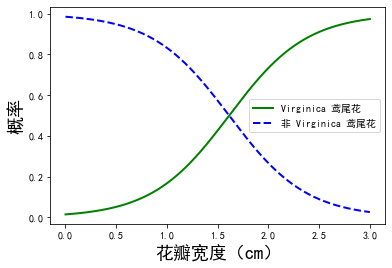

In [21]:
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] 

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Virginica 鸢尾花")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="非 Virginica 鸢尾花")

plt.xlabel('花瓣宽度（cm）' ,fontsize=18)
plt.ylabel('概率', fontsize=18)
plt.legend()

<center> 图2 鸢尾花与非鸢尾花的花瓣宽度决策边界 <\center>

可以看到，对于花瓣宽度超过 2cm 的花，分类器可以很有信心地说它是一朵 Virginica 鸢尾花，对于花瓣宽度低于 1cm 的花。也可以大概率地说它不是一朵 Virginica 鸢尾花。

In [23]:
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
decision_boundary

array([1.61561562])

对于花瓣宽度大约为 1.6cm 的花，其是 Virginica 鸢尾花的概率超过 50%，因此分类器认为它是一朵 Virginica 鸢尾花；对于花瓣宽度大约为 1.4cm 的花，其是 Virginica 鸢尾花的概率低于 50%，因此分类器认为它不是一朵 Virginica 鸢尾花。

In [24]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

***

还是同样的数据集，这次使用两个特征：花瓣宽度和花瓣长度。经过训练，虚线表示模型估算概率为 50% 的点，即模型的决策边界。需要注意这里是一个线性边界（它是使方程 $\theta_0+\theta_1x_1+\theta_2x_2=0$ 的点 $x$ 的集合）。每条平行线都分别代表一个模型输出的特定概率，从左下的 15% 到右上的 90%。根据这个模型，右上线之上的所有花都有超过 90% 的概率属于  Virginica 鸢尾花。<sup>[3]

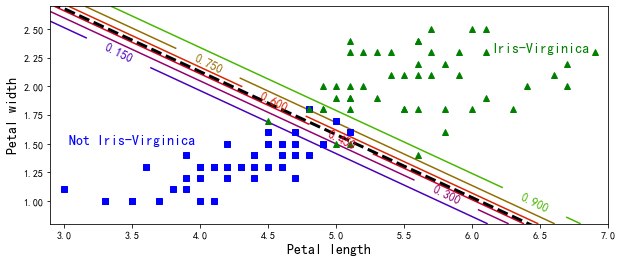

In [25]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

<center> 图3 线性决策边界</center>

# 参考资料

[1] 周志华. 机器学习[M]. 北京: 清华大学出版社, 2016: 57-59.

[2] 李航. 统计学习方法[M]. 北京: 清华大学出版社, 2012: 78-79.

[3] Aurelien Geron, 王静源, 贾玮, 边蕤, 邱俊涛. 机器学习实战：基于 Scikit-Learn 和 TensorFlow[M]. 北京: 机械工业出版社, 2018: 129-131.